# Brain Image Library

Name: Jie SIng Yoo

Andrew ID: jiesingy

* You can work in groups, it is highly encouraged. Basic divide-and-conquer.
* But each of you will have to submit your notebook and data on Canvas.

You have been given access to a database where you can pull information from one table. The purpose of this exercise is to

* clean the local copy of the table
* compute some basic information about the files in the table
* add these features to the table
* use the original raw data to create a second table
* use these 2 tables to make some pretty plots

In theory, the file and dataset level features you will be computing in this exercise will be stored in a database and used for a dashboard.

## Exercise 1
a. The variable `file` belows points to a CSV file with the file informations. Load the table into the workspace using Pandas or Dask.

**Hint**
If you use Pandas, set `low_memory` to `False`. For more info click [here](https://stackoverflow.com/questions/58551446/how-to-set-low-memory-to-false).

In [ ]:
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
import os
import subprocess
from pathlib import Path
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

In [ ]:
# INSERT CODE HERE

file = '/bil/workshops/2022/data-science/final_project_dataset.csv'
df = pd.read_csv(file, header = 0, low_memory=False)
df.head()

,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128
0,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895-metainfo.txt,.txt,693.0,2019-12-0503:26:25,2f83f9da49a4fc59b80b9185207055832653ddf51117e3...,aae6752c964e56146934fef4e2e21491,None
1,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895.json,.json,534.0,2019-12-0503:27:38,55b2e61954ae32118f7d923a710489b0355123142579b9...,2704360b304105e180fb08ef06d1a52b,None
2,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,xxhash_dat_mouseID_19022522-190895,NaN,1071128.0,2019-12-0408:54:50,906545fa0dead8e6a5496ba803e9acd2a2d439b66db691...,fa2aaf565457ed5d5701d22d59f54506,None
3,NaN,009c1e6fcc03ebac,UNKNOWN,191178,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,xxhash_dat_mouseID_19032517-191178,NaN,1096722.0,2020-06-2907:43:20,c4e07196782566e7773f69b1eba310492c2bd5355a273f...,18758836aa7a3697dfcbc10ffc76dba2,None
4,NaN,009c1e6fcc03ebac,UNKNOWN,190896,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190896.json,.json,534.0,2020-06-2204:21:19,cbca27551e57bba24c13aff4f8344614b5ff95fb2ac7c0...,dd486c5107c9ee689df7588eedf399f6,None


In [ ]:
print(df.shape)
df.info()

(2825872, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2825872 entries, 0 to 2825871
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   dataset_uuid        float64
 1   collection_id       object 
 2   dataset_id          object 
 3   sample_id           object 
 4   directory           object 
 5   filepath            object 
 6   filename            object 
 7   file_extension      object 
 8   file_size           float64
 9   file_creation_date  object 
 10  sha256              object 
 11  md5                 object 
 12  xxh128              object 
dtypes: float64(2), object(11)
memory usage: 280.3+ MB


b. Print the column names.

In [ ]:
# INSERT CODE HERE
df.columns

Index(['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory',
       'filepath', 'filename', 'file_extension', 'file_size',
       'file_creation_date', 'sha256', 'md5', 'xxh128'],
      dtype='object')

c. This dataframe has one line per file in the file system. The data wrangler already included some file level statistics in the table. However before we can proceed adding more columns, we need to fix some things.

For example, if you take a look at the file creation dates, these look like

```
df['file_creation_date'][0]
'2019-12-0503:26:25'
```

when in fact these should look like 

```
'2019-12-05 03:26:25'
```

First change the values in the column `file_creation_date` so the dates are correct.

Second, change the data type of this series to be a `datetime` object.

**Hint**
* Add a whitespace.

In [ ]:
df.file_creation_date.isnull().sum()
#  this column has 2 null values

2

In [ ]:
df[df['file_creation_date'].isna()]
# drop the 2 rows as they both contain NaN values for all columns and not useful

# df['file_creation_date'].map(type).value_counts(dropna=False)

,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128
1470465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN
1470467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN


In [ ]:
df = df[df['file_creation_date'].notna()]
df.reset_index(inplace=True)

In [ ]:
# INSERT CODE HERE
# change the data type of this series to be a datetime object
tqdm.pandas()
df['file_creation_date'] = df['file_creation_date'].astype("string")
df['file_creation_date'] = pd.to_datetime(df.loc[:,'file_creation_date'].progress_apply(lambda t: t[:10] + ' ' + t[10:]),errors='coerce')

  0%|          | 0/2825870 [00:00<?, ?it/s]

d. The column `file_size` has the file size in bytes. Add a column named `human_readable_file_size` that is dtype string. This string representation of the file size should be an approximation to the nearest unit with one decimal point. For example, `15M`, `1.7G` and `5.6T`.

In [ ]:
df['file_size'].isnull().sum()

0

In [ ]:
# INSERT CODE HERE
def convert_filesize(size):
    size_name = ("B", "K", "M", "G", "T", "P", "E", "Z", "Y")
    i = 0
    if size >= 1024:        
        while size >= 1024:
            size = size / 1024
            i += 1
            # print(size)
    size = round(size,1)
    return str(size)+str(size_name[i])

In [ ]:
df['human_readable_file_size'] = df.progress_apply(lambda s: convert_filesize(s.file_size),axis=1)
# s is classified as a series in pandas

  0%|          | 0/2825870 [00:00<?, ?it/s]

In [ ]:
df.tail(4)

,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128,human_readable_file_size
2825868,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_03928_CH1_resample.tif,.tif,4127021.0,2019-08-20 07:18:47,3bafec76445cefc9cbca6f9a3572032abe5bdff640386d...,78fea404674dce120bb9abc27dbe8ef3,None,3.9M
2825869,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_06980_CH1_resample.tif,.tif,4897429.0,2019-08-20 08:56:03,9da049ab835813ffac994fc440e741253173f02e744394...,4b0b17b798017768cac9bc82dc6d40fd,None,4.7M
2825870,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_07971_CH1_resample.tif,.tif,4718253.0,2019-08-20 09:19:10,9f7cd38d4cc8dba574fa352f145c519db6dd1d90e8efc5...,31bf67b4689a2e6b8debca6c7e1c6b22,None,4.5M
2825871,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_06978_CH1_resample.tif,.tif,4896531.0,2019-08-20 09:21:56,593f0052150dab61e4f9386c3898361802a2156b3f26d6...,6a42441d43f41c38d0af1a6f7f04b7a1,None,4.7M


e. The column `xxh128` is empty. To compute this hash and populate this column we will use the function below. However, due to time constraints, we will only compute these hash for files whose extensions are not `.tif`/`.tiff`.

For each file in the table, whose extension is not `.tif`/`.tiff`, compute the hash and store it in the column `xxh128`. Files without this hash, should remain as `None`.

In [ ]:
#INSERT CODE HERE
def compute_xxh128sum(row, filename):
    if Path(str(filename)).is_file():
        # if (".tif" in df.loc[row,'file_extension']) 
            results = subprocess.check_output('/bil/packages/xxhash/0.8.0/xxh128sum ' + str(filename) + ' | cut -d" " -f1 | xargs', shell=True)
            return results.decode("utf-8").strip()


In [ ]:
df.file_extension.isnull().sum()

1654

In [ ]:
# select files whose extensions are not .tif/.tiff
for i in tqdm(range(len(df))):
    if (df.loc[i,'file_extension'] != '.tif' and df.loc[i,'file_extension'] != '.tiff') and df.loc[i,'xxh128'] == None:
        df.loc[i,'xxh128'] = compute_xxh128sum(i, df.loc[i,'filepath'])
        
# df['file_extension'].str.contains('.tif', regex=False).value_counts()

  0%|          | 0/2825870 [00:00<?, ?it/s]

In [ ]:
df['xxh128'].value_counts()

None                                2437615
99aa06d3014798d86001c324468d497f       2060
651976fbc991205dfcdafc6480036f56        748
7dfb16e572e0e88b57ac248295debf75        165
1f06fc3e270ce9e3230932ba33f77b68        162
                                     ...   
eafa1af11131d33b3b640c4f938595ad          1
940ea595b8df48a2d91272b42bb64b1e          1
21c9738d33cf3c5610c374ae68b71d38          1
b593a4349d2c2ec5b767ee190671ac01          1
49bbab65a497067d676ffd801ae45629          1
Name: xxh128, Length: 383006, dtype: int64

In [ ]:
df.xxh128.isnull().sum()

0

f. Add column `exists`. Use the value in `filepath` to find if the file exists on disk. If the file exists, then populate the column as `True`. `False` otherwise.

**Hint** 
* Use `Path` from `pathlib`.
* All files should exist, if some of these don't, then report it. Not your fault.

In [ ]:
#INSERT CODE HERE
def check_exist(file):
    try:
        exist = Path(str(file)).exists()
        return exist
    except PermissionError:
        return False


In [ ]:
df['exists'] = df.progress_apply(lambda f: check_exist(f.filepath),axis=1)

In [ ]:
# save to temp file
# df.to_csv('temp.tsv',sep='\t')
df.exists.value_counts()

True     2824340
False       1530
Name: exists, dtype: int64

In [ ]:
df.tail(4)

,index,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128,human_readable_file_size,download_link,download_timestamp,response_code,download_ready,exists
2825866,2825868,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_03928_CH1_resample.tif,.tif,4127021.0,2019-08-20 07:18:47,3bafec76445cefc9cbca6f9a3572032abe5bdff640386d...,78fea404674dce120bb9abc27dbe8ef3,None,3.9M,NaN,NaT,NaN,NaN,True
2825867,2825869,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_06980_CH1_resample.tif,.tif,4897429.0,2019-08-20 08:56:03,9da049ab835813ffac994fc440e741253173f02e744394...,4b0b17b798017768cac9bc82dc6d40fd,None,4.7M,NaN,NaT,NaN,NaN,True
2825868,2825870,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_07971_CH1_resample.tif,.tif,4718253.0,2019-08-20 09:19:10,9f7cd38d4cc8dba574fa352f145c519db6dd1d90e8efc5...,31bf67b4689a2e6b8debca6c7e1c6b22,None,4.5M,NaN,NaT,NaN,NaN,True
2825869,2825871,NaN,009c1e6fcc03ebac,UNKNOWN,192870,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,192870_06978_CH1_resample.tif,.tif,4896531.0,2019-08-20 09:21:56,593f0052150dab61e4f9386c3898361802a2156b3f26d6...,6a42441d43f41c38d0af1a6f7f04b7a1,None,4.7M,NaN,NaT,NaN,NaN,True


g. Add columns `download_link`, `download_ready`, `response_code`, `download_timestamp`. Add these four columns and set the default values to `None`.

In [ ]:
#INSERT CODE HERE
df['download_link'], df['download_ready'], df['response_code'], df['download_timestamp'] = None, None, None, None

In [ ]:
df.tail(4)

h. We can populate the columns above at the same time to minimize the number of requests. In this case, each value in `filepath` can be turned into an download link. For example, the file `/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032506-191184/readme.txt` can be turned into a URL by replacing the prefix `/bil/data` with `https://download.brainimagelibrary.org`, leading to `https://download.brainimagelibrary.org/00/9c/009c1e6fcc03ebac/mouseID_19032506-191184/readme.txt`.

Download the response header (not the file) to determine if the file is reachable. Add `True` to `download_ready` if the file is reachable. `False` otherwise.

Save the response code from the request to column `response_code` as an integer, e.g. 202, 404, etc.

Record the timestamp when you made this request to column `download_timestamp`. This column should be of dtype `datetime`.

**Hints**
* Write a single method that can perform these tasks in a single call.
* You could also write a method that takes the full dataframe and returns and updated dataframe.
* You should be saving checkpoints to avoid recomputation.
* All links should be reachable. If some of these aren't that's a problem, but not your problem.



In [ ]:
#INSERT CODE HERE
def pathtolink(filepath	):
    link = filepath.replace('/bil/data', 'https://download.brainimagelibrary.org', 1)
    response = requests.get(link)
    timestamp = datetime.datetime.now()
    status = response.status_code
    ready = True
    if response.status_code == 200 or response.status_code == 308:
        ready = True
    else:
        ready = False
    return link, timestamp, status, ready

In [ ]:
for i in tqdm(range(len(df))):
    link, timestamp, response, ready = pathtolink(df.loc[i,'filepath'])
    df.loc[i,'download_link'] = link
    df.loc[i,'download_timestamp'] = timestamp
    df.loc[i,'response_code'] = response
    df.loc[i,'download_ready'] = ready
    
    if i % 10000 == 0 or i == len(df)-1:
        print('checkpoint', i)
        df.to_csv('temp3.tsv',sep='\t',index=False)

  0%|          | 0/805869 [00:00<?, ?it/s]

In [ ]:
df.head(5)

,dataset_uuid,collection_id,dataset_id,sample_id,directory,filepath,filename,file_extension,file_size,file_creation_date,sha256,md5,xxh128
0,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895-metainfo.txt,.txt,693.0,2019-12-0503:26:25,2f83f9da49a4fc59b80b9185207055832653ddf51117e3...,aae6752c964e56146934fef4e2e21491,None
1,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190895.json,.json,534.0,2019-12-0503:27:38,55b2e61954ae32118f7d923a710489b0355123142579b9...,2704360b304105e180fb08ef06d1a52b,None
2,NaN,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,xxhash_dat_mouseID_19022522-190895,NaN,1071128.0,2019-12-0408:54:50,906545fa0dead8e6a5496ba803e9acd2a2d439b66db691...,fa2aaf565457ed5d5701d22d59f54506,None
3,NaN,009c1e6fcc03ebac,UNKNOWN,191178,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,xxhash_dat_mouseID_19032517-191178,NaN,1096722.0,2020-06-2907:43:20,c4e07196782566e7773f69b1eba310492c2bd5355a273f...,18758836aa7a3697dfcbc10ffc76dba2,None
4,NaN,009c1e6fcc03ebac,UNKNOWN,190896,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,190896.json,.json,534.0,2020-06-2204:21:19,cbca27551e57bba24c13aff4f8344614b5ff95fb2ac7c0...,dd486c5107c9ee689df7588eedf399f6,None


In [ ]:
df["response_code"].value_counts()

404    726130
Name: response_code, dtype: int64

i. Populate the column `dataset_uuid`. This one is tricky. This dataframe has one row per file. These files are grouped together in datasets. However the column `dataset_uuid` is empty. And now we need to populate it.

A dataset can be identified as a combination of `collection_id`, `sample_id` and `directory`. Generate a unique [UUID](https://www.educba.com/python-uuid/) for each unique combination of `collection_id`, `sample_id` and `directory`. Use the UUID to populate the column `dataset_uuid`. Keep in mind there will be multiple rows in this table that will share the combination of `collection_id`, `sample_id` and `directory`, hence all of these rows should also have the `dataset_uuid` as it means these are all part of the same dataset.

In [ ]:
import uuid
import hashlib

In [ ]:
#INSERT CODE HERE
df['dataset_uuid'] = df.groupby(['collection_id','sample_id','directory']).dataset_uuid.transform(lambda x: uuid.uuid4())

In [ ]:
# df.groupby(['collection_id','sample_id','directory']).dataset_uuid
# dftempgrp['dataset_uuid'] = dftempgrp.progress_apply(lambda f: uuid.uuid3(uuid.NAMESPACE_DNS, f.directory),axis=1)

k. If you haven't done it (and you should have saved some checkpoints), then save the df to disk as a pickle file and as a tsv file. Save it to `manifest.tsv` and `manifest.pkl`.

In [ ]:
#INSERT CODE HERE
import pickle

handle = open('manifest.pkl', 'wb')
pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

df.to_csv('manifest.tsv',sep='\t',index=False)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


## Exercise 2
a. Create another dataframe with columns `['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory', 'file_extensions','timestamp']`.

i. Set `file_extensions` to `None`.

ii. Use the values in the first dataframe to populate the other columns.

iii. Record the timestamp when you made this request to column `timestamp`. This column should be of dtype `datetime`.

**Hints**
* The first dataframe had a row per each file in the dataset. Whereas the second dataframe should have one row per dataset.

In [ ]:
#INSERT CODE HERE
# df2 = df[['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory', 'file_extensions','timestamp']]
df2 = pd.DataFrame(columns=['dataset_uuid', 'collection_id', 'dataset_id', 'sample_id', 'directory', 'file_extensions','timestamp'])
df2['file_extensions'] = None
df2['dataset_uuid'] = df['dataset_uuid']
df2['collection_id'] = df['collection_id']
df2['dataset_id'] = df['dataset_id']
df2['sample_id'] = df['sample_id']
df2['directory'] = df['directory']
df2['timestamp'] = datetime.datetime.now() 

In [ ]:
df2.drop_duplicates(subset=['dataset_uuid'],inplace=True)
# df2.tail()

In [ ]:
df2

,dataset_uuid,collection_id,dataset_id,sample_id,directory,file_extensions,timestamp
0,3e8a5a54-23f8-42f7-a8cb-b8bd429bcefd,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,NaN,2022-10-23 21:31:29.026759
3,4ae7710b-7d6d-4566-92fd-e527ff5c0b24,009c1e6fcc03ebac,UNKNOWN,191178,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,NaN,2022-10-23 21:31:29.026759
4,713fe4c7-2f4d-4c59-8172-17feaaffbab9,009c1e6fcc03ebac,UNKNOWN,190896,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,NaN,2022-10-23 21:31:29.026759
8,96a6d33a-3d29-4b3b-990c-d3e6da9cbe0b,009c1e6fcc03ebac,UNKNOWN,191180,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,NaN,2022-10-23 21:31:29.026759
9,d137f5fd-ace5-487d-a904-8572b3a88033,009c1e6fcc03ebac,UNKNOWN,190897,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,NaN,2022-10-23 21:31:29.026759
...,...,...,...,...,...,...,...
2708749,538a44a4-fd3b-448a-9fa5-2969885d3763,009c1e6fcc03ebac,UNKNOWN,192865,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,NaN,2022-10-23 21:31:29.026759
2732865,d6cda7f6-9026-47ed-a74c-a149c66714d8,009c1e6fcc03ebac,UNKNOWN,192867,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,NaN,2022-10-23 21:31:29.026759
2756755,e344082e-9a15-4a5e-9838-1096f0dca01a,009c1e6fcc03ebac,UNKNOWN,192868,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,NaN,2022-10-23 21:31:29.026759
2780059,a4c8cc69-f166-4537-a228-364faa8ee1e7,009c1e6fcc03ebac,UNKNOWN,192869,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,NaN,2022-10-23 21:31:29.026759


import warnings
warnings.filterwarnings("ignore")b. For each dataset in the first dataframe, count the number of file extensions.

i. Store these values as JSON in the column `file_extensions`. For example, if a dataset has 100 `.tif`s and 1000 `.jpeg`s, then you should store the string `{'tif':100,'jpeg':1000 }`.

ii. If a dataset has a file extension that is `None` or `Nan` store it as `other`. For example, `{'tif':100,'jpeg':1000, 'other':4 }`.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## JSON code to be inserted
def check_null(s):
    if str(s) == 'nan' or s==None:
        return True
    else:
        return False

temp_file = 'tempQ2.tsv'

if Path(temp_file).exists():                         
    df2 = pd.read_csv(temp_file, sep='\t', low_memory=False)
else: 
    # if temp_file does not exist, populate df2['file_extensions']
    exts = []
    for i in tqdm(df['dataset_uuid'].unique()):
        #print(i)
        df_temp = df[df['dataset_uuid']==i]
        df_temp['file_extension'] = df_temp['file_extension'].apply(lambda f: 'other' if check_null(f) else f)
        extensions = str(df_temp['file_extension'].value_counts().to_json())
        #print(extensions)
        exts.append(extensions)
    df2['file_extensions'] = exts


  0%|          | 0/3412 [00:00<?, ?it/s]

In [ ]:
df2

,dataset_uuid,collection_id,dataset_id,sample_id,directory,file_extensions,timestamp
0,3e8a5a54-23f8-42f7-a8cb-b8bd429bcefd,009c1e6fcc03ebac,UNKNOWN,190895,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,"{"".txt"":1,"".json"":1,""other"":1}",2022-10-23 21:31:29.026759
3,4ae7710b-7d6d-4566-92fd-e527ff5c0b24,009c1e6fcc03ebac,UNKNOWN,191178,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,"{"".txt"":2,""other"":1,"".json"":1}",2022-10-23 21:31:29.026759
4,713fe4c7-2f4d-4c59-8172-17feaaffbab9,009c1e6fcc03ebac,UNKNOWN,190896,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,"{"".txt"":2,"".json"":1,""other"":1}",2022-10-23 21:31:29.026759
8,96a6d33a-3d29-4b3b-990c-d3e6da9cbe0b,009c1e6fcc03ebac,UNKNOWN,191180,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19032...,"{"".txt"":2,""other"":1,"".json"":1}",2022-10-23 21:31:29.026759
9,d137f5fd-ace5-487d-a904-8572b3a88033,009c1e6fcc03ebac,UNKNOWN,190897,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_19022...,"{"".txt"":2,"".json"":1,""other"":1}",2022-10-23 21:31:29.026759
...,...,...,...,...,...,...,...
2708749,538a44a4-fd3b-448a-9fa5-2969885d3763,009c1e6fcc03ebac,UNKNOWN,192865,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,"{"".tif"":24116}",2022-10-23 21:31:29.026759
2732865,d6cda7f6-9026-47ed-a74c-a149c66714d8,009c1e6fcc03ebac,UNKNOWN,192867,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,"{"".tif"":23890}",2022-10-23 21:31:29.026759
2756755,e344082e-9a15-4a5e-9838-1096f0dca01a,009c1e6fcc03ebac,UNKNOWN,192868,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,"{"".tif"":23304}",2022-10-23 21:31:29.026759
2780059,a4c8cc69-f166-4537-a228-364faa8ee1e7,009c1e6fcc03ebac,UNKNOWN,192869,/bil/data/00/9c/009c1e6fcc03ebac/mouseID_w1905...,"{"".tif"":23638}",2022-10-23 21:31:29.026759


In [ ]:
# for a certain value in 1 particular column, count the occurence of each value in a column
# df['dataset_uuid'] = df.groupby(['dataset_uuid']).dataset_uuid.transform(lambda x: uuid.uuid4())
# dfgrp = df.groupby(['collection_id','sample_id','directory'])
# df['file_extension'].value_counts(dropna=False).to_json()

In [ ]:
# df['file_extension'].value_counts(dropna=False)

In [ ]:
# https://stackoverflow.com/questions/48344087/get-the-count-for-each-subgroup-in-a-multiple-grouped-pandas-dateframe-aggregate

c. Save the dataframe to disk as a pickle file and as a tsv file. Save it to `datasets.tsv` and `datasets.pkl`.

In [ ]:
#INSERT CODE HERE
import pickle
handle = open('datasets.pkl', 'wb')
pickle.dump(df2, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

df.to_csv('datasets.tsv`',sep='\t',index=False)

## Exercise 3
a. Create another dataframe with columns `['timestamp', 'number_of_datasets', 'number_of_collections', 'number_of_files', 'file_extensions']`.

i. Timestamp records the current date, not the time, e.g. 2022-01-23.

ii. The number of datasets in the `datasets` dataframe goes in `number_of_datasets`.

iii. The number of unique collections in the `datasets` dataframe goes in `number_of_collections`.

iv. The total number of files in the `manifest` dataframe goes in `number_of_files`.

v. Another tricky one. Aggregate all the file extensions in column `file_extensions` in dataframe `datasets`, collect these as a single JSON block and it to `file_extensions` in this dataframe.

In [ ]:
from datetime import date 

In [ ]:
#INSERT CODE HERE
df3 = pd.DataFrame(columns=['timestamp', 'number_of_datasets', 'number_of_collections', 'number_of_files', 'file_extensions'])
df3.loc[0,'number_of_datasets']= df2['dataset_uuid'].nunique()
df3.loc[0,'number_of_collections'] = df2['collection_id'].nunique()
df3.loc[0,'number_of_files'] = df['filepath'].nunique()

df['file_extension'] = df['file_extension'].apply(lambda f: 'other' if check_null(f) else f)
df3.loc[0,'file_extensions'] = str(df['file_extension'].value_counts().to_json())

df3['timestamp'] = date.today()

In [ ]:
df3

,timestamp,number_of_datasets,number_of_collections,number_of_files,file_extensions
0,2022-10-23,3411,761,2825295,"{"".tif"":1327631,"".ktx"":658657,"".jp2"":432628,""...."


b. Save the dataframe to disk as a pickle file and as a tsv file. Save it to `info.tsv` and `info.pkl`.

In [ ]:
#INSERT CODE HERE
handle = open('info.pkl', 'wb')
pickle.dump(df3, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

df3.to_csv('info.tsv',sep='\t',index=False)

## Exercise 4
Create some pretty plots and embed them in this notebook. Feel free to use any plotting library in Python. Make them pretty though. 

a. Waffleplot. Create a waffleplot from the column `file_extensions` in the dataframe `info`. 

* Title should be the date in `timestamp`.
* No axis labels.
* Add legend.

**Hints***
* Use `pywaffle`.

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.1 MB 58.4 MB/s 


In [ ]:
from pywaffle import Waffle

In [ ]:
file = 'info.tsv'
if Path(file).exists():
    df4a = pd.read_csv(file,sep='\t')
else:
    print('file does not exists')

In [ ]:
# load json library
import json

string = df3['file_extensions'][0]

# convert string to  object
d = json.loads(string)

# convert json to dataframe
Extension = pd.DataFrame.from_dict(d, orient='index', columns=['count']).reset_index() # pd.read_json(json_obj, orient ='index')
Extension.rename(columns={"index": "file_extension"},inplace=True)

# reduce the count numbers so that they can fit into the waffle plot
Extension['reduce'] = round(Extension['count']/1000)
print(Extension)

     file_extension    count  reduce
0              .tif  1327631  1328.0
1              .ktx   658657   659.0
2              .jp2   432628   433.0
3              .swc   270720   271.0
4              .ims    65107    65.0
5       .microscope    22030    22.0
6      .acquisition    22030    22.0
7              .txt    16672    17.0
8              .raw     3237     3.0
9             other     1654     2.0
10             .xml     1555     2.0
11             .bat      942     1.0
12          .marker      736     1.0
13             .SWC      679     1.0
14             .png      464     0.0
15            .json      176     0.0
16             .jpg      156     0.0
17              .db      147     0.0
18             .csv      139     0.0
19             .nd2       77     0.0
20             .dat       71     0.0
21          .master       47     0.0
22             .nii       47     0.0
23        .finished       46     0.0
24             .bin       28     0.0
25          .format       26     0.0
2

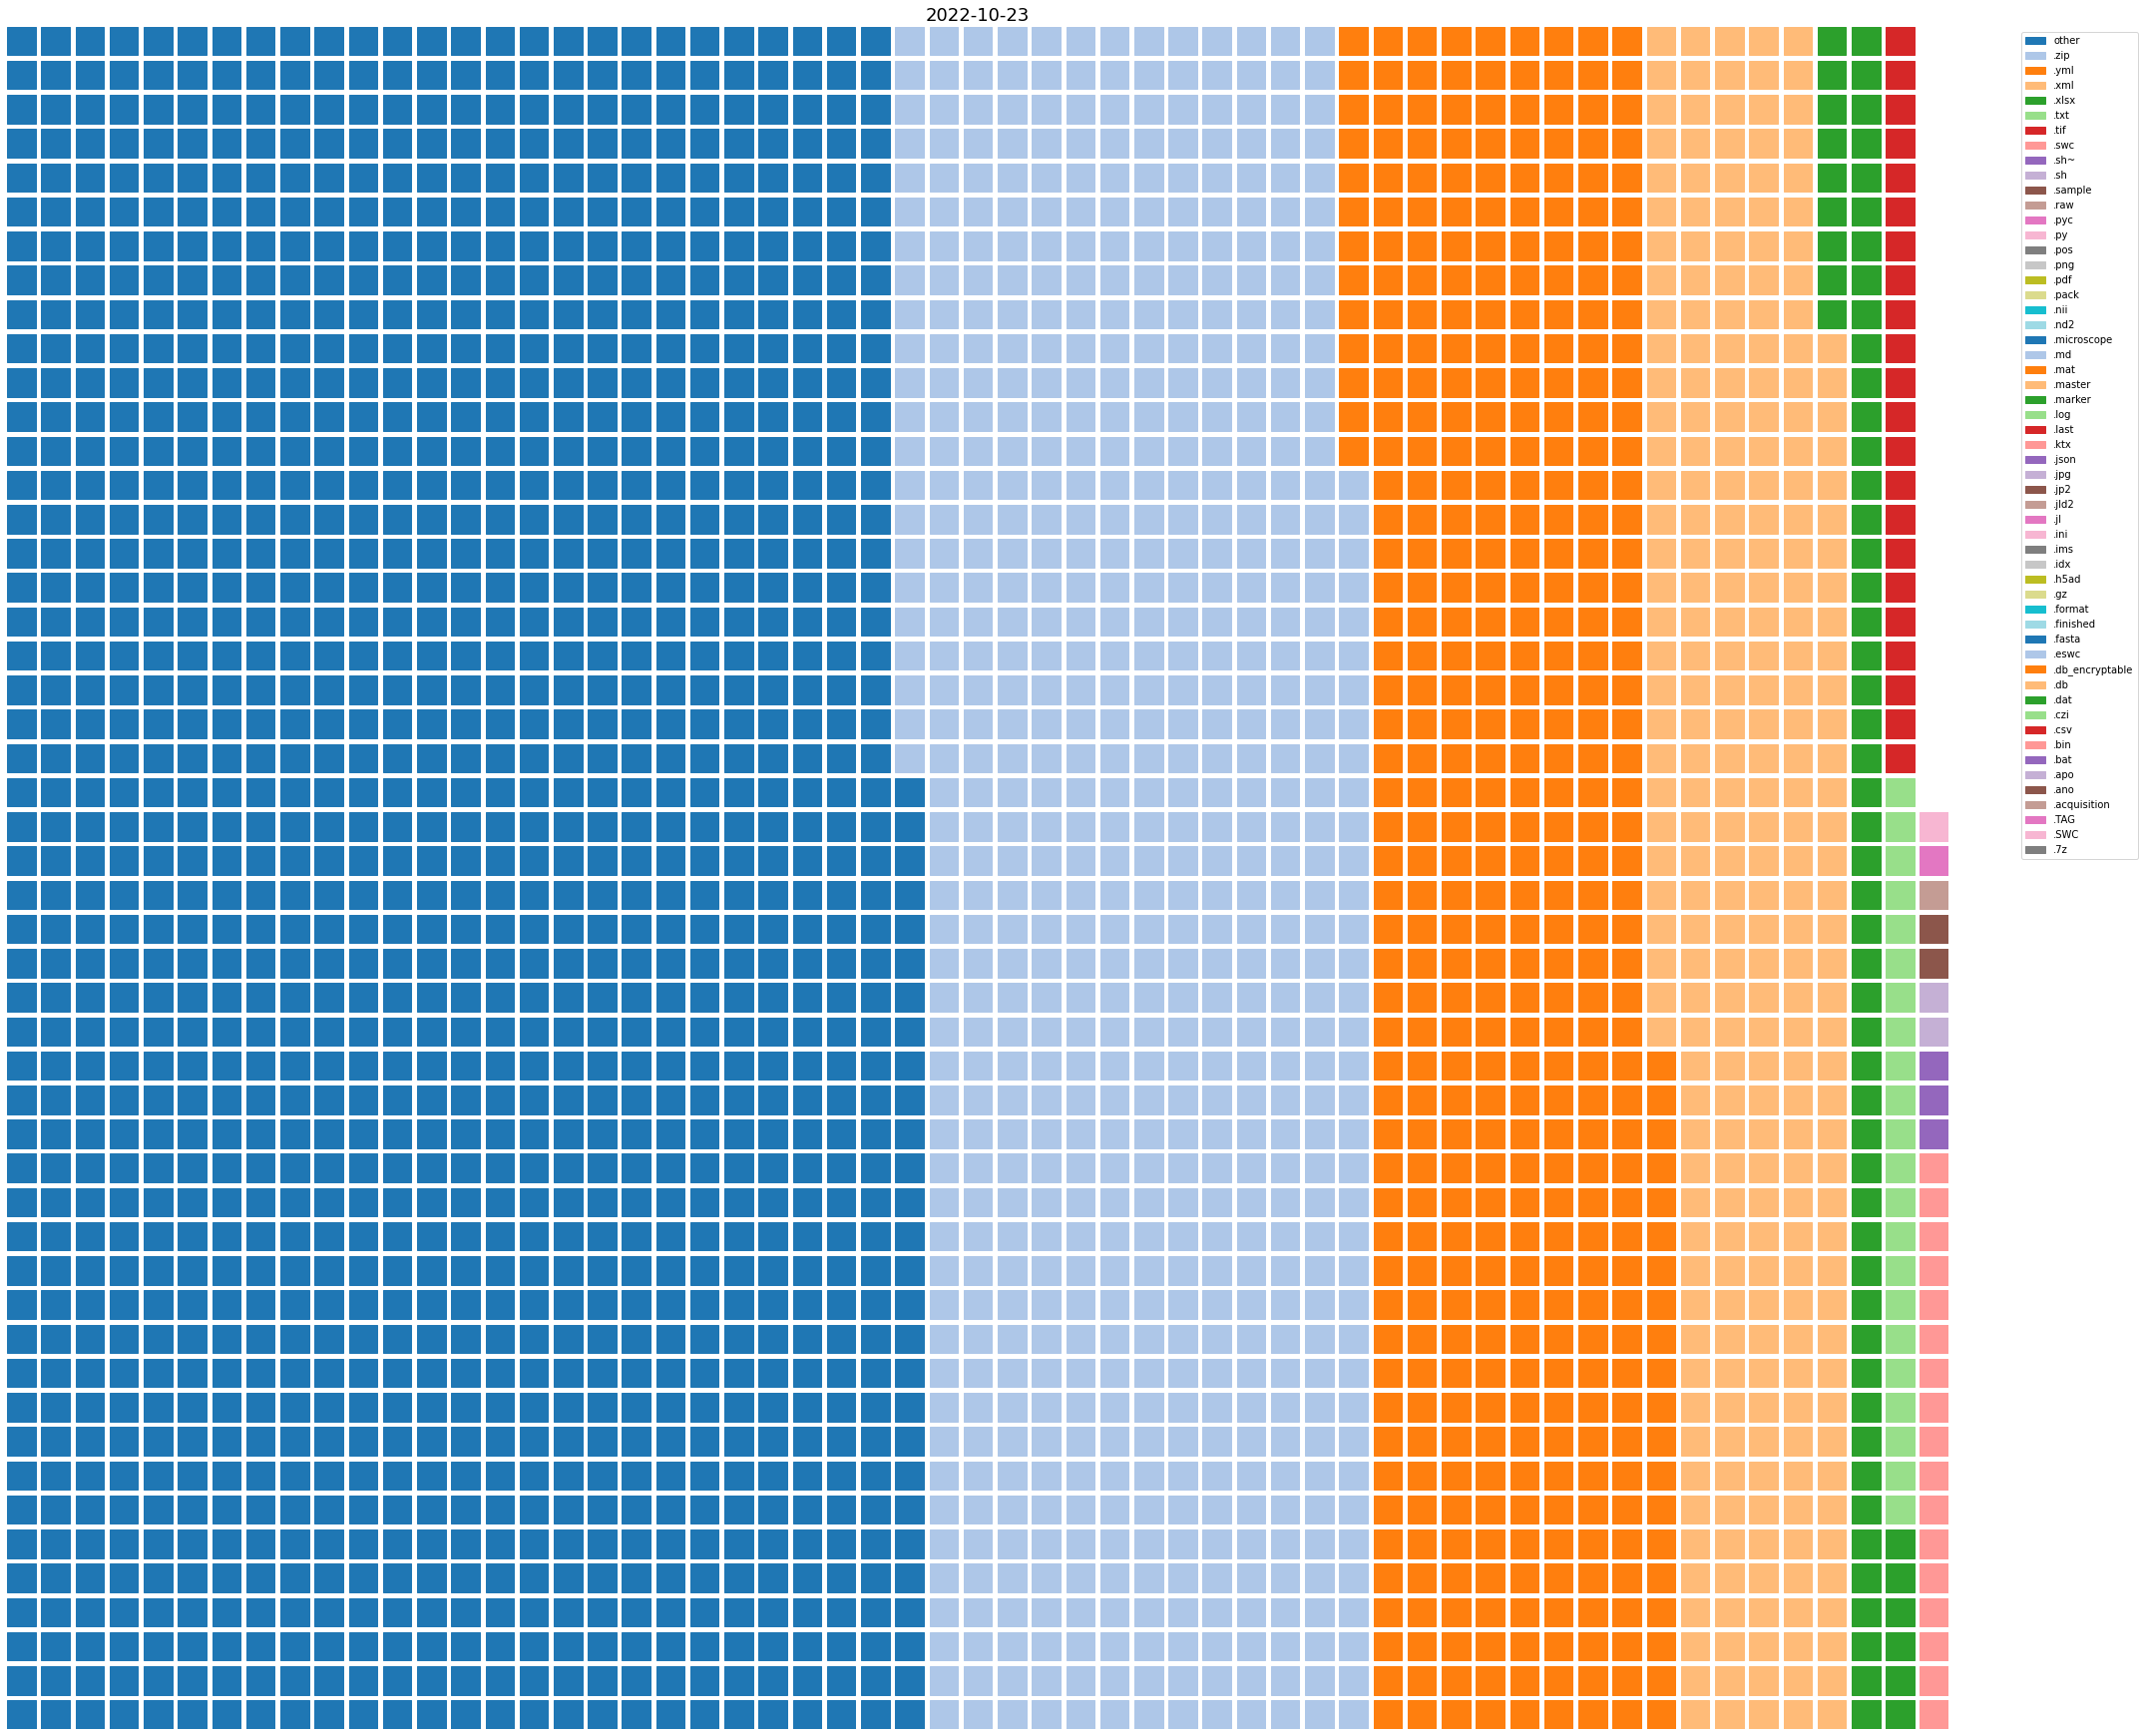

In [ ]:
#INSERT CODE HERE
fig = plt.figure(
    figsize=(30, 30),
    FigureClass = Waffle,
    rows = 50,
    values = sorted(list(Extension['reduce']),reverse = True),
    labels = sorted(list(Extension['file_extension']),reverse = True),
    legend={'loc': 'upper right', 'bbox_to_anchor': (1.1, 1)},
    cmap_name="tab20",
    title = {'label':df3['timestamp'][0],'fontsize':18}
)

b. Histogram. Make a histogram using the column `download_ready` from the dataframe `manifest`. 

* Set title to `Broken links`
* Values set to `False` should be labeled as `Broken`.
* Values set to `True` should be labeled as `Not Broken`.
* No legend.
* Set y-label to `Number of links`

In [ ]:
file = '/content/drive/MyDrive/38610/Modern Programming for Data Science/Coursework/Project/manifest.tsv'
if Path(file).exists():
    df4b = pd.read_csv(file,sep='\t')
else:
    print('file does not exists')
# df4c.head()

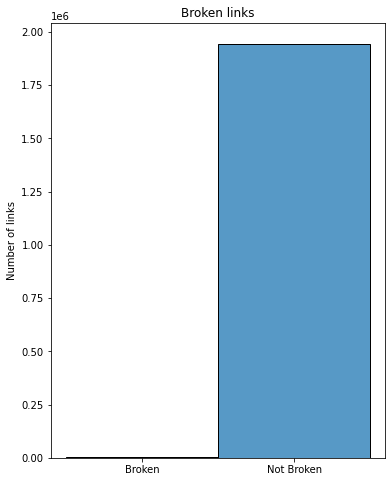

In [ ]:
#INSERT CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize figure size
plt.figure(figsize = ( 6 , 8))
  
# Plot histogram
fig = sns.histplot(data=df4b, stat='count', x='download_ready',bins=2)
fig.set(xlabel=None)
fig.set_xticks([0.25, 0.75])
fig.set(xticklabels=['Broken','Not Broken'])
#fig.tick_params(bottom=False) 
fig.set(ylabel='Number of links')
fig.set(title='Broken links')

# Display figure
plt.show()

c. Pie chart. Create a pie chart using the values in `status_code` in the dataframe `manifest`. 

* Title should be `Status codes`.
* Add legends.

In [ ]:
file = '/content/drive/MyDrive/38610/Modern Programming for Data Science/Coursework/Project/manifest.tsv'
if Path(file).exists():
    df4c = pd.read_csv(file,sep='\t')
else:
    print('file does not exists')
# df4c.head()

   index  response_code
0    200        1945082
1    404           4079
2    403            840


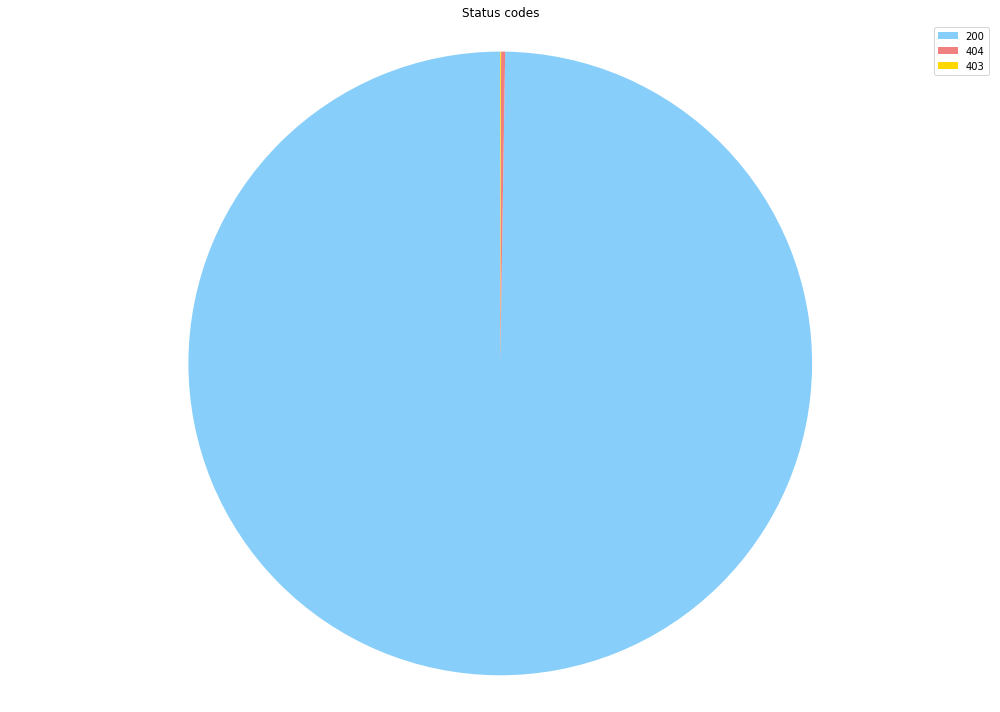

In [ ]:
#INSERT CODE HERE
status = pd.DataFrame(df['response_code'].value_counts().reset_index())
status['index'] = status['index'].apply(lambda x: int(x))
print(status)

# Set colors
colors = ['lightskyblue', 'lightcoral', 'gold']

# Create pie chart

plt.figure(figsize = ( 14 , 10))

labels = status['index']
sizes = status.response_code
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Status codes')
plt.axis('equal')
plt.tight_layout()

plt.show()

d. Create a plot using the values in `file_creation_date` in dataframe manifest. However, this exercise is open-ended. 

This is my user-story and your job is to create the best plot you think will show what I want.

* The only part I care about the `file_create_date` is the date. Or months, or years, not sure.
* What I want to do is to create a plot that I can show the increment of data through the years.
* I am still debating whether I should just show how many files are available per year, or do a cumulative plot since it should be, in theory, monotonically increasing.

What do you think? Make a plot, convince me your plot is the best.

In [ ]:
#INSERT CODE HERE
def to_date(dt):
    date = str(dt)[0:10]
    return date

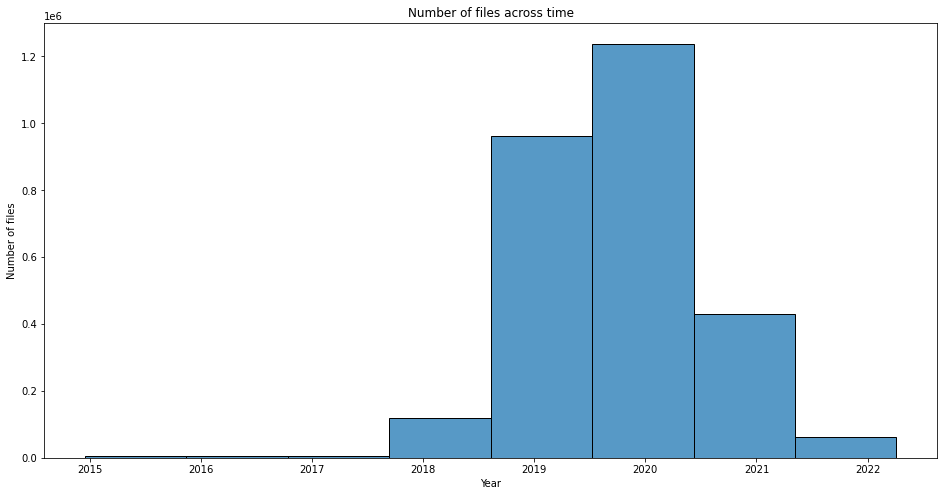

In [ ]:
file = '/content/drive/MyDrive/38610/Modern Programming for Data Science/Coursework/Project/manifest.tsv'
if Path(file).exists():
  # Set up data
  df = pd.read_csv(file, sep='\t', low_memory=False )
  status = pd.DataFrame(df['response_code'].value_counts().reset_index())
  df['file_creation_date_only'] = df.apply(lambda f: to_date(f.file_creation_date),axis=1)
  df['file_creation_date_only'] = pd.to_datetime(df['file_creation_date_only'],errors='coerce')  
  
  # Initialize figure size
  plt.figure(figsize = ( 16 , 8))
  
  # Plot histogram
  fig = sns.histplot(data=df, stat='count', x='file_creation_date_only',bins = 8)
  fig.set(xlabel='Year')
  # fig.set(xticklabels=set(df['file_creation_date_only']))
  #fig.tick_params(bottom=False) 
  fig.set(ylabel='Number of files')
  fig.set(title='Number of files across time')

  # Display figure
  plt.show()

else:
    print(file, ' does not exist')

In [ ]:
# Save figure
pic = fig.figure
images_dir = '/content/drive/MyDrive/38610/Modern Programming for Data Science/Coursework/Project/'
pic.savefig(f"{images_dir}/4d.png")